In [1]:
%load_ext autoreload



In [2]:
%autoreload 2

In [5]:
import os, os.path, fnmatch, re
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import Neptune_data_read, int_norm, evaluation
import pylab as plt
from scipy import stats
#%pylab inline


In [19]:
path = "/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/"
all_exp_files = []
sample = []

for root, dirs, files in os.walk(path):
    [all_exp_files.append(os.path.join(root, _file))\
        for _file in fnmatch.filter(files, '*.exp')]


all_exp_files.pop(-2)
all_exp_files.pop(-1)
all_exp_files

['/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_1.exp',
 '/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_2.exp',
 '/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_3.exp',
 '/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_4.exp',
 '/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_5.exp',
 '/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_6.exp',
 '/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_7.exp',
 '/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_8.exp']

In [30]:
# cup configuration
#cup_config = cycle_Sb
Sn_isotopes = ["117", "118", "119", "120", "122", "124"]
cup_config = cycles_1_Neptune 

# Mass Range of cup configuration
mass_range = cycle_Sn_nep_mass_range

# Isotopes used for Interference correction
corr_isotopes_1 = {"Cd" : "111", "Te" : "125"}
#corr_isotopes_2 = {"Cd" : "111", "Te" : "125", "Xe" : "129"}
corr_isotopes_2 = {}
corr_isotopes_Sb = {"Te": "125"}

norm_ratio = ["122","118"]
#denom_isotope = norm_ratio[1]
denom_isotope = "118"
#Sn_monitor = ["111", "113", "125"]
Sn_monitor = []

def eval_iso_list(isotopes_list,norm_ratio, denom_iso, monitor_iso):
    isotope_nom = norm_ratio[0]
    isotope_den = denom_iso
    isotopes_list.remove(isotope_den)
    for i in range(len(monitor_iso)):
        isotopes_list.append(monitor_iso[i])
    isotopes_list.sort()
    return isotopes_list

isotope_ls = eval_iso_list(Sn_isotopes, norm_ratio, denom_isotope,Sn_monitor)

data_sample_column = [(i + "/" + denom_isotope) for i in isotope_ls]    
isotopes = [isotope_ls]

#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = False
# background correction
blk_corr = True
print isotope_ls

['117', '119', '120', '122', '124']


In [20]:
columns_1 = ["cycle", "sample", "date", "117Sn", "118Sn", "119Sn", "120Sn", "121Sb", "122Sn", "123Sb", "124Sn"]
df_all = pd.DataFrame()
blk_ls = []
sample_ls = []

for sample in all_exp_files:
    print sample
    df = Neptune_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_signals(sample)
    df_zero_1 = pd.DataFrame(df_zero["cycle1"])
    sample_name = df.extract_metadata(sample, "Sample ID")
    date = df.extract_metadata(sample, "Analysis date")
    starttime = df.extract_metadata(sample, "Analysis time")
    df_zero_1["date"] = datetime.strptime(date+starttime, ' %m/%d/%Y %I:%M:%S %p')
    df_zero_1["sample"] = sample_name
    df_zero_1["cycle"] = df_zero_1.index.values
    df_zero_1.index = df_zero_1["date"]
    df_zero_1 = df_zero_1[columns_1]
    df_all = df_all.append(df_zero_1, ignore_index = True)
    
    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean" or sample_name == "Teflon blk":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "Teflon blk" or sample_name == "4ml HDPE blank":
        None
    else:
        sample_ls.append(sample)

df_all.set_index("date", inplace = True)
df_all
#for x in [123]:
#    sample_ls.remove(x)
#blk_ls = blk_ls[0::5]
#blk_ls.remove(4544)
df_all

/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_1.exp
/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_2.exp
/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_3.exp
/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_4.exp
/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_5.exp
/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_6.exp
/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_7.exp
/Volumes/friebelm/PhD/Neptune/Sn_Data_Tiger_raw/Sn_outlier_test_20160819-182445/50ppbSn_20ppb Sb_8.exp


,cycle,sample,117Sn,118Sn,119Sn,120Sn,121Sb,122Sn,123Sb,124Sn
date,,,,,,,,,,
2016-08-19 18:24:45,1,50ppbSn_20ppb Sb,1.846725,5.903644,2.120286,8.148708,2.432878,1.186784,1.865398,1.519885
2016-08-19 18:24:45,2,50ppbSn_20ppb Sb,1.831021,5.854002,2.102107,8.079047,2.412215,1.176676,1.849647,1.506798
2016-08-19 18:24:45,3,50ppbSn_20ppb Sb,1.783838,5.703733,2.048248,7.871851,2.352099,1.146463,1.803512,1.468217
2016-08-19 18:24:45,4,50ppbSn_20ppb Sb,1.723732,5.511144,1.978949,7.605528,2.272509,1.107639,1.742377,1.418409
2016-08-19 18:24:45,5,50ppbSn_20ppb Sb,1.828435,5.846295,2.099087,8.067215,2.406558,1.174776,1.845116,1.504203
2016-08-19 18:24:45,6,50ppbSn_20ppb Sb,1.866687,5.967704,2.142996,8.236012,2.457369,1.199352,1.884075,1.536010
2016-08-19 18:24:45,7,50ppbSn_20ppb Sb,1.861544,5.951495,2.137276,8.214070,2.452418,1.196213,1.880326,1.532020
2016-08-19 18:24:45,8,50ppbSn_20ppb Sb,1.858067,5.940449,2.133377,8.198995,2.448111,1.194121,1.877170,1.529176
2016-08-19 18:24:45,9,50ppbSn_20ppb Sb,1.834507,5.865279,2.106336,8.095454,2.417589,1.179087,1.853802,1.510033


In [31]:
#files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_internal_norm = pd.DataFrame()

for sample in sample_ls:
    df = Neptune_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_signals(sample)
    new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
    
    data_sample_raw = new_corr.raw_signals(denom_isotope)
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = new_corr.mad_outlier_rejection(data_sample_raw)
    
    data_sample = new_corr.internal_norm_1(norm_ratio, denom_isotope, iter_beta)
    #data_sample = new_corr.external_norm_Sb(norm_ratio, denom_isotope, iter_beta)
    #data_sample = new_corr.raw_ratios_corr(denom_isotope)
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = new_corr.mad_outlier_rejection(data_sample)
    
    sample_name = df.extract_metadata(sample, "Sample ID")
    date = df.extract_metadata(sample, "Analysis date")
    starttime = df.extract_metadata(sample, "Analysis time")
    data_sample = data_sample.drop(denom_isotope, axis=1)
    data_sample = data_sample[sorted(data_sample.columns)]
    data_sample.columns = data_sample_column
    data_sample["date"] = datetime.strptime(date+starttime, ' %m/%d/%Y %I:%M:%S %p')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_internal_norm = df_internal_norm.append(data_sample)

In [32]:
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

#df_internal_sub["Cd/Sn"] = (df_internal_norm["111"]/12.722)/(df_internal_norm["118"]/24.223)
#df_internal_sub["Te/Sn"] = (df_internal_norm["125"]/7.0509)/(df_internal_norm["118"]/24.223)
#df_internal_sub["Te/Sn"] = (df_internal_norm["126"]/18.952)/(df_internal_norm["118"]/24.223)
#df_internal_sub = df_internal_sub[df_internal_sub["118"] >= 0.2]
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [33]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

def SD2(x):
    SD2 = 2 * np.std(x)
    return SD2

df_internal_norm_mean = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).mean()
df_internal_norm_mean_sd = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).agg([np.mean, SD2])
df_internal_norm_mean["sample"] = df_internal_sub[~df_internal_sub.index.duplicated(keep='first')]["sample"]
df_internal_norm_mean_sd["sample"] = df_internal_sub[~df_internal_sub.index.duplicated(keep='first')]["sample"]
#df_internal_norm_mean = df_internal_norm_mean.drop(datetime.strptime("20150310 23:59", "%Y%m%d %H:%M"))
#df_internal_norm_mean_sd = df_internal_norm_mean_sd[1:8]
df_internal_norm_mean_sd
#epsilon = epsilon.drop(["118"], axis = 1)
#plotplot = df_internal_norm_mean[(df_internal_norm_mean["125"] < 0.00010)  & (df_internal_norm_mean["124/120"] > 0.17745)] 
#plot(plotplot["125"], plotplot["124/120"], "ro")

117/118             119/118             120/118  \
                         mean       SD2      mean       SD2      mean   
date                                                                    
2016-08-19 18:24:45  0.316762  0.000071  0.354611  0.000058  1.345971   
2016-08-19 19:26:33  0.316763  0.000069  0.354609  0.000057  1.345969   
2016-08-19 20:28:18  0.316763  0.000067  0.354603  0.000054  1.345962   
2016-08-19 21:30:07  0.316766  0.000068  0.354607  0.000060  1.345971   
2016-08-19 22:31:54  0.316762  0.000060  0.354606  0.000051  1.345968   
2016-08-19 23:33:44  0.316764  0.000070  0.354607  0.000059  1.345963   
2016-08-20 00:35:33  0.316766  0.000073  0.354606  0.000064  1.345960   
2016-08-20 01:37:19  0.316763  0.000072  0.354607  0.000061  1.345960   

                               122/118                 124/118            \
                          SD2     mean           SD2      mean       SD2   
date                                                                       
2016-08-19 18:24:45  0.000135  0.19125  9.436896e-16  0.239058  0.000037   
2016-08-19 19:26:33  0.000131  0.19125  9.436896e-16  0.239055  0.000038   
2016-08-19 20:28:18  0.000123  0.19125  9.436896e-16  0.239053  0.000039   
2016-08-19 21:30:07  0.000134  0.19125  9.436896e-16  0.239053  0.000041   
2016-08-19 22:31:54  0.000116  0.19125  9.436896e-16  0.239058  0.000036   
2016-08-19 23:33:44  0.000140  0.19125  9.436896e-16  0.239054  0.000037   
2016-08-20 00:35:33  0.000141  0.19125  9.436896e-16  0.239054  0.000041   
2016-08-20 01:37:19  0.000136  0.19125  9.436896e-16  0.239054  0.000040   

                           ...               118       119            \
                           ...               SD2      mean       SD2   
date                       ...                                         
2016-08-19 18:24:45        ...          0.342168  2.074554  0.122858   
2016-08-19 19:26:33        ...          0.312869  2.034469  0.112333   
2016-08-19 20:28:18        ...          0.359186  1.985362  0.128991   
2016-08-19 21:30:07        ...          0.272737  1.927299  0.097935   
2016-08-19 22:31:54        ...          0.230556  1.966034  0.081350   
2016-08-19 23:33:44        ...          0.276276  1.902746  0.099216   
2016-08-20 00:35:33        ...          0.280450  1.860548  0.100726   
2016-08-20 01:37:19        ...          0.226190  1.845888  0.081222   

                          120                 122                 124  \
                         mean       SD2      mean       SD2      mean   
date                                                                    
2016-08-19 18:24:45  7.973412  0.472073  1.161349  0.068726  1.487468   
2016-08-19 19:26:33  7.819928  0.431706  1.139347  0.062491  1.459228   
2016-08-19 20:28:18  7.631611  0.495787  1.111829  0.072227  1.424333   
2016-08-19 21:30:07  7.408350  0.376354  1.079290  0.054817  1.382639   
2016-08-19 22:31:54  7.557631  0.312571  1.100988  0.045910  1.411032   
2016-08-19 23:33:44  7.314549  0.381319  1.065809  0.055550  1.365608   
2016-08-20 00:35:33  7.152513  0.387145  1.042248  0.056399  1.335475   
2016-08-20 01:37:19  7.096267  0.312168  1.034094  0.045487  1.325074   

                                          sample  
                          SD2                     
date                                              
2016-08-19 18:24:45  0.087989   50ppbSn_20ppb Sb  
2016-08-19 19:26:33  0.080510   50ppbSn_20ppb Sb  
2016-08-19 20:28:18  0.092518   50ppbSn_20ppb Sb  
2016-08-19 21:30:07  0.070196   50ppbSn_20ppb Sb  
2016-08-19 22:31:54  0.057722   50ppbSn_20ppb Sb  
2016-08-19 23:33:44  0.071152   50ppbSn_20ppb Sb  
2016-08-20 00:35:33  0.072235   50ppbSn_20ppb Sb  
2016-08-20 01:37:19  0.058265   50ppbSn_20ppb Sb  

[8 rows x 23 columns]

In [34]:
df_internal_norm_sample_sd = df_internal_norm_mean.groupby(df_internal_norm_mean["sample"]).agg([np.mean, SD2])
df_internal_norm_sample_sd

117/118             119/118             120/118            \
                       mean       SD2      mean       SD2      mean       SD2   
sample                                                                          
 50ppbSn_20ppb Sb  0.316764  0.000003  0.354607  0.000005  1.345966  0.000009   

                   122/118                 124/118              ...     \
                      mean           SD2      mean       SD2    ...      
sample                                                          ...      
 50ppbSn_20ppb Sb  0.19125  5.551115e-17  0.239055  0.000004    ...      

                        118                 119                 120            \
                       mean       SD2      mean       SD2      mean       SD2   
sample                                                                          
 50ppbSn_20ppb Sb  5.427844  0.421757  1.949613  0.151236  7.494283  0.580256   

                        122                 124            
                       mean       SD2      mean       SD2  
sample                                                     
 50ppbSn_20ppb Sb  1.091869  0.084264  1.398857  0.107526  

[1 rows x 22 columns]

/Users/marf/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()


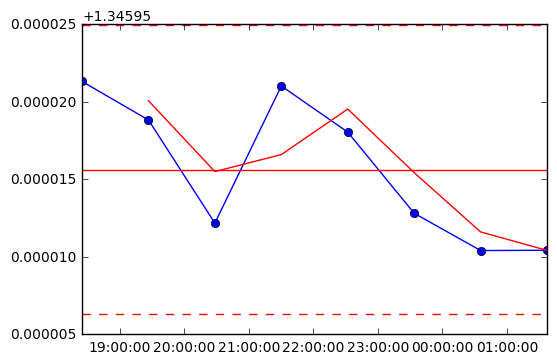

In [35]:
# variation of standard data + mean + 2SD
sel_ratio = "120/118"
plot_Nist = df_internal_norm_mean
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].mean(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].mean()+ 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

In [26]:
df_all.to_csv(path + "Sn_H9_L4_1_cycles_NU_Signals_zero_corr.csv", mode='w', header=True)

In [36]:
df_internal_norm.to_csv(path + "Sn_H8_L4_1_cycles_Neptune_internal_norm_122_118_all.csv", mode='w', header=True)

In [37]:
df_internal_norm_mean_sd.to_csv(path + "Sn_H8_L4_1_cycles_Neptune_internal_norm_122_118_mean.csv", mode='w', header=True)